<a href="https://colab.research.google.com/github/codewonka/ml-repository/blob/main/TensorFlow_Course_from_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TensorFlow-Course](https://lab.github.com/everydeveloper/introduction-to-tensorflow) Learning Lab in GitHub.


In [ ]:
!nvidia-smi

Sun Jul  4 09:03:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Practice/TensorFlow-Image Processing"

/content/drive/MyDrive/Colab Notebooks/Practice/TensorFlow-Course from GitHub


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

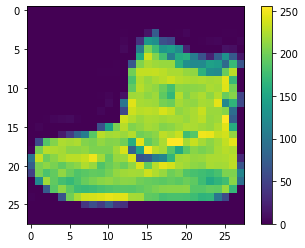

In [ ]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
org_train_images = train_images
org_test_images = test_images

train_images = train_images / 255.0
test_images = test_images / 255.0

# Model Generation
### Our model will be constructed from 3 layers.
- The First Layer
  - often referred to as the Input Layer – will intake an image and format the data structure in a method acceptable for the subsequent layers.
  - In our case, this first layer will be a Flatten layer that intakes a multi-dimensional array and produces an array of a single dimension, this places all the pixel data on an equal depth during input.
- Next Layers
  - Both of the next layers will be simple fully connected layers, referred to as Dense layers, with 128 and 10 nodes respectively.
  - These fully connected layers are the simplest layer in the sense of understanding.
  - yet allow for the greatest number of layer-to-layer connections and relationships.
- The final bit of hyper-technical knowledge you'll need to learn is that each layer can have its own particular mathematical operation. These activation functions determine the form and relationship between the information provided by the layer. The first dense layer will feature a Rectified Linear Unit (ReLU) Activation Function that outputs values between zero and 1; mathematically, the activation function behaves like f(x)=max(0,x). The final layer uses the softmax activation function. This function also produces values in the 0-1 range, BUT generates these values such that the sum of the outputs will be 1! This makes the softmax a layer that is excellent at outputting probabilities.

In [ ]:
model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

# Training the Model
- Models must be both compiled and trained prior to use. When compiling we must define a few more parameters that control how models are updated during training (optimizer), how the model's accuracy is measured during training (loss function), and what is to be measured to determine the model's accuracy (metrics). These values were selected for this project, yet are generally dependent on the model's intent and expected input and output.

In [ ]:
model.compile( optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4987 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.8920


# Evaluating Our Model
- Now we are working with a functional and trained NN model. Following our logic from the top, we have built a NN that intakes a (28,28) array, flattens the data into a (784) array, compiled and trained 2 dense layers, and the softmax activation function of the final output layer will provide a probability that the image belongs to each of the 10 label categories.
- Model.evaluate provides two outputs, the value of the loss function over the testing examples, and the accuracy of the model over this testing population. The important output for us is the model's accuracy.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8710


In [ ]:
print(test_acc)   # 모델 정확도

0.8709999918937683


# Prediction (using test_images)

In [ ]:
# test image 를 넣고 라벨 예측하기
predictions = model.predict(test_images)
predictions[0]

array([2.5019139e-07, 3.9552177e-08, 3.6471658e-08, 1.1787570e-08,
       5.2976251e-08, 2.2368850e-02, 2.6032229e-08, 9.3161933e-02,
       5.7432394e-06, 8.8446307e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])    # 예측된 라벨

9

In [ ]:
test_labels[0]    # 실제 라벨

9

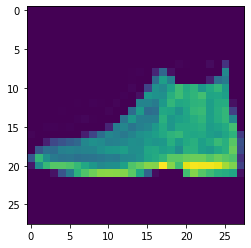

In [ ]:
plt.imshow(test_images[0])
plt.show()

# Finish
- There you have it! You have built and trained your first neural network from scratch, and properly classified a boot as a boot!

- Next Steps

  1. Try using the model on a item of clothing outside the dataset (make sure to preprocess it first so it is on the same scale as the other images).
  2. Find another to try this out on.
  3. Make an interface that responds with a label when you select a clothing image.